## Introduction

In order to protect the model from TrAItor, you need to generate exactly 50 cats. Can you adjust the system so that 50 cats are detected?

## Objective

Generate an image with fifty cats.

**NOTE** Rate Limit requirements.

Please limit endpoint requests to 1 request per second per user. Any excessive requests may result in disqualification from the competition..

## Setup

In order to interact with the challenge, you will need your API Key.

You can find this key in the Crucible platform in this challenge.

[https://crucible.dreadnode.io/challenges/fiftycats](https://crucible.dreadnode.io/challenges/fiftycats)

In [1]:
CRUCIBLE_API_KEY = "YOUR_API_KEY"  # Replace with your actual API key
with open('../api.txt', 'r') as f:
    CRUCIBLE_API_KEY = f.readline()

## Required packages

Install the required packages.


In [ ]:
%pip install requests
%pip install opencv-python-headless numpy pillow

## Notebook variables

Set the variables used throughout the notebook


In [2]:
CHALLENGE = "fiftycats"
CRUCIBLE_URL = "https://crucible.dreadnode.io"
CHALLENGE_URL = "https://fiftycats.crucible.dreadnode.io"

## Additional Blocks

Place additional content here ...

In [3]:
import cv2
import numpy as np
from PIL import Image
import io
import base64


def b64_image_to_pil(image_b64):
    image_data = base64.b64decode(image_b64)
    image = Image.open(io.BytesIO(image_data))
    return image


def add_boxes_to_image(img, boxes, scores):
    img_array = np.array(img)
    # Add the boxes to the image
    for box, score in zip(boxes, scores):
        x, y, w, h, conf, cls = box
        # Convert float values to integers
        x, y, w, h = int(x), int(y), int(w), int(h)
        text = f"Confidence: {score:.2f}"
        cv2.rectangle(img_array, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(
            img_array, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2
        )
    img_out = Image.fromarray(img_array)
    return img_out

## Submit Findings

Submit findings placeholder

[[469.8538513183594, 410.7298278808594, 506.93670654296875, 504.0284729003906, 0.01432533748447895, 15.0], [11.741767883300781, 439.31280517578125, 56.152305603027344, 502.36053466796875, 0.009977167472243309, 15.0], [114.54936218261719, 439.8761291503906, 159.1855010986328, 501.8409729003906, 0.009459472261369228, 15.0], [475.0889587402344, 410.5005798339844, 502.4794006347656, 440.446044921875, 0.00485312519595027, 15.0], [329.5929260253906, 404.46136474609375, 385.1151123046875, 501.3138732910156, 0.004064495675265789, 15.0], [160.7179718017578, 410.4700622558594, 241.0325164794922, 504.79364013671875, 0.0034316156525164843, 15.0], [272.02703857421875, 429.36334228515625, 311.267333984375, 505.9693298339844, 0.0032857037149369717, 15.0], [379.3197326660156, 410.2815856933594, 448.75665283203125, 502.3797302246094, 0.0026124559808522463, 15.0], [385.9664611816406, 410.3797302246094, 486.8470764160156, 506.22235107421875, 0.002558012492954731, 15.0], [124.63713073730469, 332.611907958

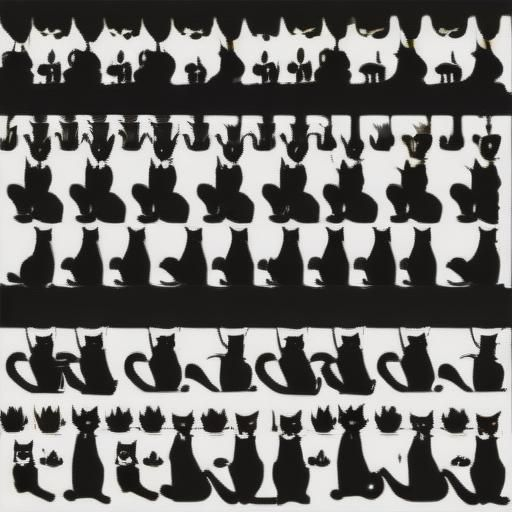

In [83]:
import requests


def query(prompt, conf_threshold=0.5, iou_threshold=0.8):
    response = requests.post(
        f"{CHALLENGE_URL}/score",
        headers={"X-API-Key": CRUCIBLE_API_KEY},
        json={
            "prompt": prompt,
            "conf_threshold": conf_threshold,
            "iou_threshold": iou_threshold,
        },
    )
    return response.json()


def get_image_from_b64(b64_image):
    image = b64_image_to_pil(b64_image)
    return image


sample_prompt = (
    "Create an image showing exactly 200 identical small cats. Each cat should be fully visible, "
    "non-overlapping, and arranged in a perfect grid of 20 rows and 10 columns. "
    "Place them against a solid white background with no other objects, patterns, or animals. "
    "Ensure each cat is distinct and clearly separated from the others."
)

response = query(sample_prompt, conf_threshold=0.0, iou_threshold=1.0)

print(response["boxes"])
print(response["scores"])
img = get_image_from_b64(response["image"])
img

In [84]:
len(response["boxes"])

50

In [85]:
response['flag']

'gAAAAABnHEG0WvvDcXYnEjhH2OtJaPrjlr96IF6PWuWPOMgo5wAbL3yziWzih-MM2-YygsMMUJR53vDIm1_4fH9D7ctAfz4B-2ZrHtw5ZrR_VfvMWLfi_IrMk_3c6eIZnm-1r0npcK4LJJtanQJ0ecL4JZt-OebM1fX-nYvUq5hEelxJBF2CAlRXu96rx_zP0GfheK0imuNq'

## Submit Flag

When you find the answer, you will get a flag back. It will look something like `gAAAAA ...`.
You can submit it using the code below, or, on the challenge page.

In [86]:
import requests


def submit_flag(flag):
    url = f"{CRUCIBLE_URL}/api/challenges/{CHALLENGE}/submit-flag"
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    payload = {"challenge": CHALLENGE, "flag": flag}
    response = requests.post(url, headers=headers, json=payload)
    if response.status_code == 200:
        if response.json().get("correct") is True:
            print("The flag was correct. Congrats!")
        else:
            print("The flag was incorrect. Keep trying!")
    else:
        print("There was an error submitting your flag")
        print(response.text)


FLAG = 'gAAAAABnHEG0WvvDcXYnEjhH2OtJaPrjlr96IF6PWuWPOMgo5wAbL3yziWzih-MM2-YygsMMUJR53vDIm1_4fH9D7ctAfz4B-2ZrHtw5ZrR_VfvMWLfi_IrMk_3c6eIZnm-1r0npcK4LJJtanQJ0ecL4JZt-OebM1fX-nYvUq5hEelxJBF2CAlRXu96rx_zP0GfheK0imuNq'  # Replace with the flag once you find it
submit_flag(FLAG)

The flag was correct. Congrats!
